<a href="https://colab.research.google.com/github/Matheusups/Datasets/blob/main/NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Limpeza dos Dados:**

---
* leitura do arquivo CSV
* filtragem para titulo, episodios e classificação(1 a 10)
* 'dropna' para limpar linhas que sejam relativas a filmes e tenham 
o n° de episodios = NaN. 

---

Dados por: IMDb


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

catalogo = pd.read_csv(r'/content/netflix_list.csv')
a = catalogo[['title','episodes','rating','isAdult','type']]
a

,title,episodes,rating,isAdult,type
0,Lucifer,93.0,8.1,0,tvSeries
1,Army of the Dead,NaN,5.8,0,movie
2,The Kominsky Method,22.0,8.2,0,tvSeries
3,Friends,235.0,8.9,0,tvSeries
4,Ragnarok,12.0,7.5,0,tvSeries
...,...,...,...,...,...
7003,Merry Happy Whatever,NaN,6.1,0,tvEpisode
7004,The Morning Show,NaN,NaN,0,tvEpisode
7005,Losers,NaN,8.0,0,tvEpisode
7006,Firefly Lane,NaN,7.3,0,tvEpisode


A coluna "isAdult" segue a lógica de que:
 
 **1 = tem conteúdo sexual adulto e 0 = não possui conteúdo adulto**.

Podemos concluir que, para o imdb, as séries e filmes da netflix não abordam seu "conteúdo sexual" como algo explicito e sim como educativo ou alívio comico.



In [57]:
a.groupby(by='isAdult').size()

isAdult
0    7008
dtype: int64

In [66]:
a = a.dropna(subset=['rating','episodes'])
a

,title,episodes,rating,isAdult,type
0,Lucifer,93.0,8.1,0,tvSeries
2,The Kominsky Method,22.0,8.2,0,tvSeries
3,Friends,235.0,8.9,0,tvSeries
4,Ragnarok,12.0,7.5,0,tvSeries
5,StartUp,30.0,8.0,0,tvSeries
...,...,...,...,...,...
5984,Girls Who Like Boys Who Like Boys,8.0,6.5,0,tvSeries
6064,Don Quijote de la Láctea,13.0,7.8,0,tvSeries
6071,Strongland,3.0,7.0,0,tvSeries
6098,Life in Our Universe,6.0,7.7,0,tvSeries


Séries que possuem a classificação geral maior que **8** :

In [109]:
filtro = a['rating'] > 8.0
notas_netflix = a[filtro]
notas = notas_netflix.head()
notas.set_index('title', inplace=True)
notas

,episodes,rating,isAdult,type
title,,,,
Lucifer,93.0,8.1,0,tvSeries
The Kominsky Method,22.0,8.2,0,tvSeries
Friends,235.0,8.9,0,tvSeries
Sweet Tooth,8.0,8.2,0,tvSeries
The Walking Dead,177.0,8.2,0,tvSeries


In [76]:
a.groupby(by='type').size()

type
movie              1
tvMiniSeries     273
tvSeries        1857
dtype: int64

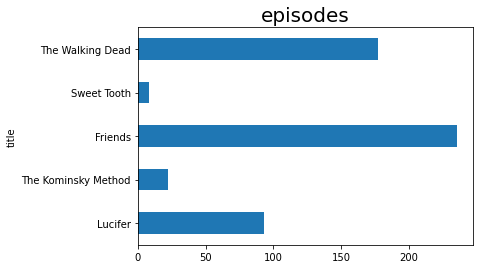

In [111]:
plt.subplot()
plt.title('episodes',fontsize = 20)
notas['episodes'].plot.barh()


O gráfico mostra que a série **Friends** é um dos grandes sucessos de streaming, visto que é uma série que vem ganhando visibilidade ao longo do tempo, sua coletanea de episódios passa da casa dos 200, o mesmo se aplica a **The Walking Dead** uma famosa série sobre zumbis, faz sucesso entre os jovens e adolescentes por ser tratar de uma série de ação.

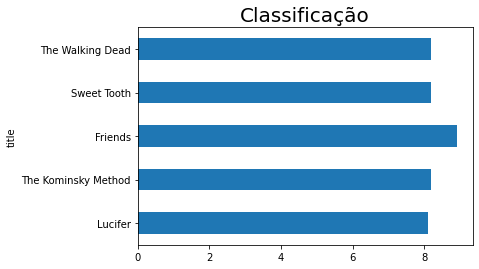

In [112]:
plt.subplot()
plt.title('Classificação',fontsize = 20)
notas['rating'].plot.barh()

Novamente entre as séries melhores classificadas, Friends destaca-se principalmente por se tratar de uma "comédia romantica" e ser um exemplo de ambiente social que as pessoas almejam.